In [74]:
import tensorflow as tf
from tensorflow import keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
from pathlib import Path
import pandas as pd
import sklearn

import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random

from skimage import exposure
from skimage.util import random_noise
from skimage import transform
from cv2 import resize
import textwrap
import cv2
from tqdm import tqdm
import os

In [75]:
os.getcwd()

'C:\\Users\\Admin\\Desktop\\Xccelerate\\DLResources-221117-020244\\Assignment -CNN\\chest_xray'

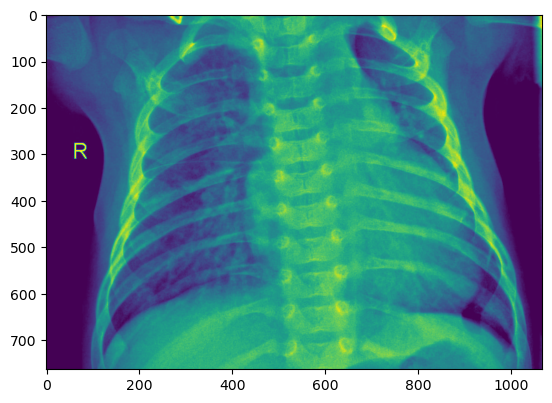

In [76]:
img = mpimg.imread('C:/Users/Admin/Desktop/Xccelerate/DLResources-221117-020244/Assignment -CNN/chest_xray/train/PNEUMONIA/BACTERIA-7422-0001.JPEG')
plt.imshow(img)

In [77]:
path_img_infected_train = 'C:/Users/Admin/Desktop/Xccelerate/DLResources-221117-020244/Assignment -CNN/chest_xray/train/PNEUMONIA/'
list_filename_infected_train = os.listdir(path_img_infected_train)
list_filename_infected_train

['BACTERIA-1008087-0001.jpeg',
 'BACTERIA-1025587-0001.jpeg',
 'BACTERIA-1027194-0001.jpeg',
 'BACTERIA-1033441-0001.jpeg',
 'BACTERIA-103798-0001.jpeg',
 'BACTERIA-103798-0002.jpeg',
 'BACTERIA-1039608-0001.jpeg',
 'BACTERIA-1040986-0001.jpeg',
 'BACTERIA-1041881-0001.jpeg',
 'BACTERIA-1041881-0002.jpeg',
 'BACTERIA-104960-0001.jpeg',
 'BACTERIA-1065620-0001.jpeg',
 'BACTERIA-1065620-0002.jpeg',
 'BACTERIA-1069837-0001.jpeg',
 'BACTERIA-1069837-0002.jpeg',
 'BACTERIA-1074715-0001.jpeg',
 'BACTERIA-1076722-0001.jpeg',
 'BACTERIA-1083680-0001.jpeg',
 'BACTERIA-1083680-0002.jpeg',
 'BACTERIA-1083680-0003.jpeg',
 'BACTERIA-1083680-0004.jpeg',
 'BACTERIA-1083680-0005.jpeg',
 'BACTERIA-1083680-0006.jpeg',
 'BACTERIA-1083680-0007.jpeg',
 'BACTERIA-1083680-0008.jpeg',
 'BACTERIA-1083680-0009.jpeg',
 'BACTERIA-1083680-0010.jpeg',
 'BACTERIA-1083680-0011.jpeg',
 'BACTERIA-1083680-0012.jpeg',
 'BACTERIA-1083680-0013.jpeg',
 'BACTERIA-1083680-0014.jpeg',
 'BACTERIA-1083680-0015.jpeg',
 'BACTERIA-

In [78]:
len(list_filename_infected_train)

3883

In [79]:
path_img_uninfected_train = 'C:/Users/Admin/Desktop/Xccelerate/DLResources-221117-020244/Assignment -CNN/chest_xray/train/NORMAL/'
list_filename_uninfected_train = os.listdir(path_img_uninfected_train)
list_filename_uninfected_train

['NORMAL-1003233-0001.jpeg',
 'NORMAL-1012843-0001.jpeg',
 'NORMAL-1014768-0001.jpeg',
 'NORMAL-1023731-0001.jpeg',
 'NORMAL-1029510-0001.jpeg',
 'NORMAL-1031320-0001.jpeg',
 'NORMAL-1034239-0001.jpeg',
 'NORMAL-1041364-0001.jpeg',
 'NORMAL-1044645-0001.jpeg',
 'NORMAL-1055663-0001.jpeg',
 'NORMAL-1063934-0001.jpeg',
 'NORMAL-1064313-0001.jpeg',
 'NORMAL-1064313-0002.jpeg',
 'NORMAL-1068231-0001.jpeg',
 'NORMAL-1068326-0001.jpeg',
 'NORMAL-1070073-0001.jpeg',
 'NORMAL-1070073-0002.jpeg',
 'NORMAL-1080088-0001.jpeg',
 'NORMAL-1097039-0001.jpeg',
 'NORMAL-1101909-0001.jpeg',
 'NORMAL-1128157-0001.jpeg',
 'NORMAL-1140710-0001.jpeg',
 'NORMAL-1150393-0001.jpeg',
 'NORMAL-1156778-0001.jpeg',
 'NORMAL-1165014-0001.jpeg',
 'NORMAL-1165014-0002.jpeg',
 'NORMAL-1170804-0001.jpeg',
 'NORMAL-1177627-0001.jpeg',
 'NORMAL-1196989-0001.jpeg',
 'NORMAL-1203236-0001.jpeg',
 'NORMAL-1206638-0001.jpeg',
 'NORMAL-1241506-0001.jpeg',
 'NORMAL-1243491-0001.jpeg',
 'NORMAL-1261648-0001.jpeg',
 'NORMAL-13115

In [81]:
len(list_filename_uninfected_train)

1349

In [92]:
# create a function to convert images to dataset - training dataset

def create_datasets_train(img_size):
    imgs_infected = []
    for file in tqdm(list_filename_infected_train[:1349]):  #tqdm is just to show the progress bar
        img_infected = cv2.imread(path_img_infected_train+file)
        img_infected = cv2.cvtColor(img_infected, cv2.COLOR_BGR2RGB)
        img_infected = cv2.resize(img_infected, (img_size,img_size))    #can use this to resize the image
        imgs_infected.append(img_infected)
        
    imgs_uninfected = []
    for file in tqdm(list_filename_uninfected_train[:1349]):
        img_uninfected = cv2.imread(path_img_uninfected_train+file)
        img_uninfected = cv2.cvtColor(img_uninfected, cv2.COLOR_BGR2RGB)
        img_uninfected = cv2.resize(img_uninfected, (img_size,img_size))    #can use this to resize the image
        imgs_uninfected.append(img_uninfected) 
    
    imgs= imgs_infected + imgs_uninfected
    
    # not yet normalized    
    imgs = np.array(imgs)
    label = []
    for i in list_filename_infected_train[:1349]:
        i = True
        label.append(i)
    for i in list_filename_uninfected_train[:1349]:
        i = False
        label.append(i)
    label = np.array(label)
        
    return imgs, label


In [93]:
IMG_SIZE = 280

In [94]:
X_train , y_train = create_datasets_train(IMG_SIZE)

100%|██████████████████████████████████████████████████████████████████████████████| 1349/1349 [00:57<00:00, 23.60it/s]


In [95]:
X_train

array([[[[179, 179, 179],
         [ 84,  84,  84],
         [ 48,  48,  48],
         ...,
         [ 37,  37,  37],
         [ 52,  52,  52],
         [ 83,  83,  83]],

        [[183, 183, 183],
         [ 77,  77,  77],
         [ 51,  51,  51],
         ...,
         [ 32,  32,  32],
         [ 53,  53,  53],
         [ 77,  77,  77]],

        [[179, 179, 179],
         [ 88,  88,  88],
         [ 47,  47,  47],
         ...,
         [ 28,  28,  28],
         [ 50,  50,  50],
         [ 75,  75,  75]],

        ...,

        [[220, 220, 220],
         [220, 220, 220],
         [219, 219, 219],
         ...,
         [ 34,  34,  34],
         [ 43,  43,  43],
         [ 51,  51,  51]],

        [[ 10,  10,  10],
         [205, 205, 205],
         [215, 215, 215],
         ...,
         [ 35,  35,  35],
         [ 30,  30,  30],
         [ 12,  12,  12]],

        [[228, 228, 228],
         [218, 218, 218],
         [218, 218, 218],
         ...,
         [ 33,  33,  33],
        

In [96]:
len(X_train)

2698

In [97]:
y_train

array([ True,  True,  True, ..., False, False, False])

In [98]:
len(y_train)

2698

In [99]:
X_train = X_train.astype('float32')
X_train /= 255.
y_train = y_train.astype('int')
y_train

array([1, 1, 1, ..., 0, 0, 0])

In [109]:
path_img_infected_test = 'C:/Users/Admin/Desktop/Xccelerate/DLResources-221117-020244/Assignment -CNN/chest_xray/test/PNEUMONIA/'
list_filename_infected_test = os.listdir(path_img_infected_test)
list_filename_infected_test

['BACTERIA-1135262-0001.jpeg',
 'BACTERIA-1135262-0002.jpeg',
 'BACTERIA-1135262-0003.jpeg',
 'BACTERIA-1135262-0004.jpeg',
 'BACTERIA-1220485-0001.jpeg',
 'BACTERIA-1351146-0001.jpeg',
 'BACTERIA-1351146-0002.jpeg',
 'BACTERIA-1351146-0003.jpeg',
 'BACTERIA-1351146-0004.jpeg',
 'BACTERIA-1351146-0005.jpeg',
 'BACTERIA-1351146-0006.jpeg',
 'BACTERIA-1514320-0001.jpeg',
 'BACTERIA-1514320-0002.jpeg',
 'BACTERIA-1514320-0003.jpeg',
 'BACTERIA-1602272-0001.jpeg',
 'BACTERIA-1602272-0002.jpeg',
 'BACTERIA-1602272-0003.jpeg',
 'BACTERIA-1602272-0004.jpeg',
 'BACTERIA-1714895-0001.jpeg',
 'BACTERIA-1714895-0002.jpeg',
 'BACTERIA-1714895-0003.jpeg',
 'BACTERIA-1768914-0001.jpeg',
 'BACTERIA-1768914-0002.jpeg',
 'BACTERIA-1768914-0003.jpeg',
 'BACTERIA-1768914-0004.jpeg',
 'BACTERIA-1768914-0005.jpeg',
 'BACTERIA-1768914-0006.jpeg',
 'BACTERIA-2034017-0001.jpeg',
 'BACTERIA-2034017-0002.jpeg',
 'BACTERIA-2034017-0003.jpeg',
 'BACTERIA-2034017-0004.jpeg',
 'BACTERIA-2034017-0005.jpeg',
 'BACTER

In [110]:
len(list_filename_infected_test)

390

In [111]:
path_img_uninfected_test = 'C:/Users/Admin/Desktop/Xccelerate/DLResources-221117-020244/Assignment -CNN/chest_xray/test/NORMAL/'
list_filename_uninfected_test = os.listdir(path_img_uninfected_test)
list_filename_uninfected_test

['NORMAL-1049278-0001.jpeg',
 'NORMAL-1110860-0001.jpeg',
 'NORMAL-11419-0001.jpeg',
 'NORMAL-115218-0001.jpeg',
 'NORMAL-1160949-0001.jpeg',
 'NORMAL-1212407-0001.jpeg',
 'NORMAL-1228182-0001.jpeg',
 'NORMAL-1283091-0001.jpeg',
 'NORMAL-1318320-0001.jpeg',
 'NORMAL-1368583-0001.jpeg',
 'NORMAL-1430636-0001.jpeg',
 'NORMAL-1520670-0001.jpeg',
 'NORMAL-152130-0001.jpeg',
 'NORMAL-159472-0001.jpeg',
 'NORMAL-1608079-0001.jpeg',
 'NORMAL-1627110-0001.jpeg',
 'NORMAL-1698651-0001.jpeg',
 'NORMAL-171327-0001.jpeg',
 'NORMAL-1759114-0001.jpeg',
 'NORMAL-1763721-0001.jpeg',
 'NORMAL-1768815-0001.jpeg',
 'NORMAL-1771524-0001.jpeg',
 'NORMAL-1784004-0001.jpeg',
 'NORMAL-1803887-0001.jpeg',
 'NORMAL-1858497-0001.jpeg',
 'NORMAL-186900-0001.jpeg',
 'NORMAL-1931427-0001.jpeg',
 'NORMAL-1944537-0001.jpeg',
 'NORMAL-2107985-0001.jpeg',
 'NORMAL-2123652-0001.jpeg',
 'NORMAL-2162145-0001.jpeg',
 'NORMAL-217318-0001.jpeg',
 'NORMAL-2233350-0001.jpeg',
 'NORMAL-2256620-0001.jpeg',
 'NORMAL-2274324-0001.

In [112]:
len(list_filename_uninfected_test)

234

In [113]:
# create a function to convert images to dataset - test dataset

def create_datasets_test(img_size):
    imgs_infected = []
    for file in tqdm(list_filename_infected_test):  #tqdm is just to show the progress bar
        img_infected = cv2.imread(path_img_infected_test+file)
        img_infected = cv2.cvtColor(img_infected, cv2.COLOR_BGR2RGB)
        img_infected = cv2.resize(img_infected, (img_size,img_size))    #can use this to resize the image
        imgs_infected.append(img_infected)
        
    imgs_uninfected = []
    for file in tqdm(list_filename_uninfected_test):
        img_uninfected = cv2.imread(path_img_uninfected_test+file)
        img_uninfected = cv2.cvtColor(img_uninfected, cv2.COLOR_BGR2RGB)
        img_uninfected = cv2.resize(img_uninfected, (img_size,img_size))    #can use this to resize the image
        imgs_uninfected.append(img_uninfected) 
    
    imgs= imgs_infected + imgs_uninfected
    
    # not yet normalized    
    imgs = np.array(imgs)
    label = []
    for i in list_filename_infected_test:
        i = True
        label.append(i)
    for i in list_filename_uninfected_test:
        i = False
        label.append(i)
    label = np.array(label)
        
    return imgs, label

In [114]:
X_test, y_test = create_datasets_test(IMG_SIZE)

100%|████████████████████████████████████████████████████████████████████████████████| 234/234 [00:10<00:00, 23.32it/s]


In [117]:
len(X_test)

624

In [119]:
len(y_test)

624

In [120]:
X_test.shape

(624, 280, 280, 3)

In [122]:
y_test.shape

(624,)

In [123]:
X_test = X_test.astype('float32')
X_test /= 255.
y_test = y_test.astype('int')
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [124]:
num_classes = 1
input_shape = IMG_SIZE, IMG_SIZE, 3
batch_size = 100
epochs = 10

In [125]:
# Define the model
model = Sequential()

# Create a CNN to classify the images
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))

In [126]:
#   define compile to minimize categorical loss, use some optimizer to optimize, and optimize to maximizing accuracy
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#   Train the model and test/validate the mode with the test data after each cycle (epoch) through the training data
#   Return history of loss and accuracy for each epoch
hist = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/10
27/27 [==============================] - 167s 6s/step - loss: 2.0657 - accuracy: 0.5374 - val_loss: 0.6926 - val_accuracy: 0.6266
Epoch 2/10
27/27 [==============================] - 176s 7s/step - loss: 0.6488 - accuracy: 0.7157 - val_loss: 0.5748 - val_accuracy: 0.6538
Epoch 3/10
27/27 [==============================] - 182s 7s/step - loss: 0.3099 - accuracy: 0.8773 - val_loss: 0.4520 - val_accuracy: 0.7420
Epoch 4/10
27/27 [==============================] - 178s 7s/step - loss: 0.2100 - accuracy: 0.9181 - val_loss: 0.3552 - val_accuracy: 0.8766
Epoch 5/10
27/27 [==============================] - 180s 7s/step - loss: 0.1492 - accuracy: 0.9437 - val_loss: 0.3290 - val_accuracy: 0.8814
Epoch 6/10
27/27 [==============================] - 179s 7s/step - loss: 0.1080 - accuracy: 0.9618 - val_loss: 0.3538 - val_accuracy: 0.8397
Epoch 7/10
27/27 [==============================] - 198s 7s/step - loss: 0.0860 - accuracy: 0.9655 - val_loss: 0.2570 - val_accuracy: 0.9022
Epoch 8/10
27

In [127]:
hist.history

{'loss': [2.0656933784484863,
  0.648797869682312,
  0.30994680523872375,
  0.20995527505874634,
  0.1491856426000595,
  0.1079568937420845,
  0.08602748811244965,
  0.08445190638303757,
  0.0747145488858223,
  0.06970176845788956],
 'accuracy': [0.5374351143836975,
  0.7157153487205505,
  0.8773165345191956,
  0.9180874824523926,
  0.9436619877815247,
  0.961823582649231,
  0.9655300378799438,
  0.9696071147918701,
  0.9740548729896545,
  0.9751667976379395],
 'val_loss': [0.6926080584526062,
  0.574766218662262,
  0.45195281505584717,
  0.35520797967910767,
  0.32903560996055603,
  0.353796124458313,
  0.2570458650588989,
  0.29821470379829407,
  0.31468939781188965,
  0.2986714243888855],
 'val_accuracy': [0.6266025900840759,
  0.6538461446762085,
  0.7419871687889099,
  0.8766025900840759,
  0.8814102411270142,
  0.8397436141967773,
  0.9022436141967773,
  0.8942307829856873,
  0.8830128312110901,
  0.8990384340286255]}

Test loss: 0.09759323298931122
Test accuracy: 0.9770200252532959


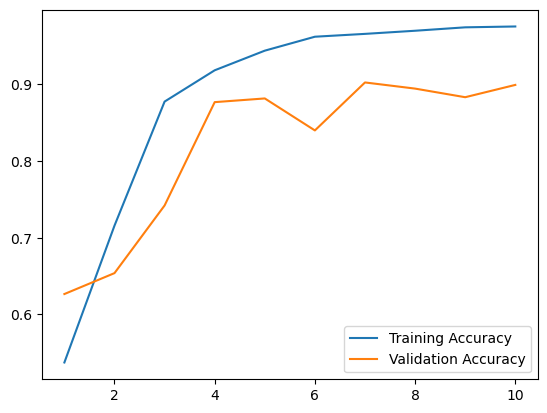

In [128]:
#   Evaluate the model with the test data to get the scores on "real" data.
score = model.evaluate(X_train, y_train, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#   Plot data to see relationships in training and validation data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
epoch_list = list(range(1, len(hist.history['accuracy']) + 1))  # values for x axis [1, 2, ..., # of epochs]
plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()